In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Importing Data

The first step of the data exploration is to understand the data at a high level. The easiest way to do that it by looking at the data head

In [2]:
df = pd.read_csv("../Data/train.csv")
df.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


In [3]:
df.shape

(27481, 4)

The training data consists of 27481 samples with 4 columns each

1. A unique identifier
2. The tweet text
3. The text within the tweet contributing to the sentiment
4. The sentiment

In [4]:
df.sentiment.value_counts()

neutral     11118
positive     8582
negative     7781
Name: sentiment, dtype: int64

The data is not split evenly as 40.5% contains neutral sentiment, 31.2% is positive and 28.3% is negative. The imbalance is not too terrible however

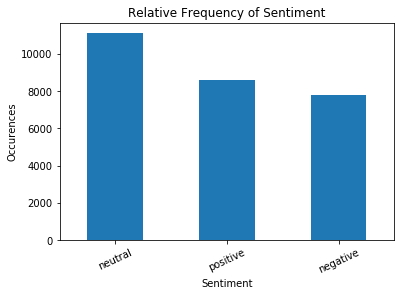

In [5]:
df.sentiment.value_counts().plot(kind="bar")
plt.title("Relative Frequency of Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Occurences")
plt.xticks(rotation=25)
sns.set(style="darkgrid")

Now lets take a look at some of the tweets to understand the length of the text samples.

In [6]:
df['text_len']  = df['text'].str.len()
df.text_len.value_counts()

41.0     308
46.0     301
48.0     301
42.0     298
45.0     295
        ... 
4.0        8
3.0        5
139.0      4
141.0      2
140.0      1
Name: text_len, Length: 139, dtype: int64

It makes sense that the tweets are capped at 140 characters as for Twitters limits but let's investigate what that occurance of 141 characters is

In [7]:
df[df["text"].str.len()>140]

,textID,text,selected_text,sentiment,text_len
3138,0d64ba9efd,Is so freaking bored on the bus. Hate being po...,bored,negative,141.0
27318,d370238b6b,just saw an advert for ATTICS TO EDEN on tv o...,just saw an advert for ATTICS TO EDEN on tv o...,neutral,141.0


Lets look a little closer at these cases

In [8]:
df.iloc[3138].text

'Is so freaking bored on the bus. Hate being poor, ï¿½4.80 return for a 10 min train or ï¿½2 return for an HOUR long bus.ipod has no battery 2'

In [9]:
df.iloc[27318].text

'just saw an advert for ATTICS TO EDEN on tv  out today and only ï¿½9.99 from HMV...so I`m not sure why I had to pay ï¿½13 at HMV...never mind'

Interestingly enough both cases have ï¿ in the text body which is a called a Byte order mark. It shoudnt cause many problems but should be dealt with when cleaning the data. It is also worth investigating how many tweets have that symbol. More info can be found [here](https://stackoverflow.com/questions/18845976/whats-%C3%AF-sign-at-the-beginning-of-my-source-file)

(array([-20.,   0.,  20.,  40.,  60.,  80., 100., 120., 140., 160.]),
 <a list of 10 Text xticklabel objects>)

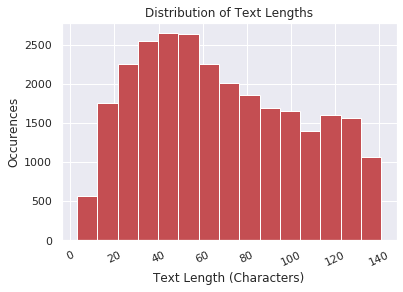

In [10]:
df.text_len.plot(kind="hist",bins = 15,color="r")
plt.title("Distribution of Text Lengths")
plt.xlabel("Text Length (Characters)")
plt.ylabel("Occurences")
plt.xticks(rotation=25)

The text lengths are relatively evenly distributed. There are more shorter texts in the dataset but not by a large degree. The color of the graph has been changed to red because I like red better.

There was some valuable insight there on the character level. Now lets try and analyze the text length on a word level

In [11]:
df['num_words'] = df.text.apply(lambda x: len(str(x).split()))
df["num_words"]

0         7
1        10
2         5
3         5
4        14
         ..
27476    16
27477    23
27478    22
27479     6
27480    11
Name: num_words, Length: 27481, dtype: int64

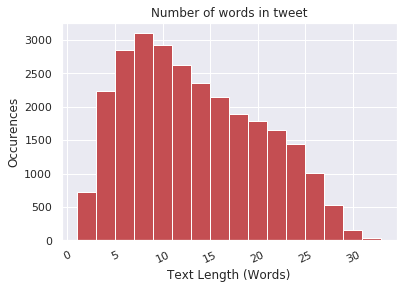

In [12]:
df.num_words.plot(kind="hist",bins = 16,color="r")
plt.title("Number of words in tweet")
plt.xlabel("Text Length (Words)")
plt.ylabel("Occurences")
plt.xticks(rotation=25)
sns.set(style="darkgrid")

Tweets are definitely more likely to contain fewer words due to the character restriction. It is easy to see how the text length begins to drop after 7 words

As long as we are analyzing text length, why dont we look at text length vs selected text length (chars)

In [13]:
cat_sentiment = {"positive":1,"neutral":0,"negative":-1}
df['cat_sentiment'] = df.sentiment.apply(lambda x: cat_sentiment[x])
df['cat_sentiment']

0        0
1       -1
2       -1
3       -1
4       -1
        ..
27476   -1
27477   -1
27478    1
27479    1
27480    0
Name: cat_sentiment, Length: 27481, dtype: int64

Does tweet length or number of words have any correlation with sentiment? If it does that would be valuable to introduce as a feature and could contribute to better model performance

In [14]:
corr_matrix = df.corr()
corr_matrix

,text_len,num_words,cat_sentiment
text_len,1.000000,0.961234,0.001507
num_words,0.961234,1.000000,-0.018130
cat_sentiment,0.001507,-0.018130,1.000000


Unfortunately as expected there is no strong correlation between word length adn sentiment, and expectedly there is a strong correlation between number of words and text length as the more words you have the longer the sentence would be

Lets now take a look at how many unique words we are dealing with in the corpus

In [15]:
results = set()
df.text.apply(lambda row : results.update(str(row).lower().split()))
len(results)

45433

There are 45433 unique words in this dataset. This will be useful information during the tokenization step

In [16]:
results

{'http://cli.gs/zzre1p',
 'hazin',
 'thurstag!!!!',
 'knockoffs',
 'grayish',
 'chalet',
 'schools;',
 'early!!',
 '_giiggl3z',
 'http://twitpic.com/4wtyj',
 'grandma`s',
 'happiness!',
 'different....',
 'bhabhi..',
 'soooo...let`s',
 'wallet',
 'goodniqht',
 'playoffs.',
 'harm',
 'prettier,',
 'tylenol*',
 'shaved',
 'honestly,',
 'gerbil',
 'buyer',
 'besties!',
 'mention',
 'sorts',
 'monday!!!!',
 'collector',
 'album??',
 'house,',
 'brand-new',
 'malena,',
 'joan:',
 'format?',
 'http://plurk.com/p/sv70e',
 'http://myloc.me/20dd',
 'grice`s',
 'http://tinyurl.com/c9ryqc',
 'vast.',
 'http://www.thinkgeek.com/books/nonfiction/b322/',
 'web/graphic',
 'favorite,',
 '40k:',
 '****-****',
 'mikados',
 'sparks.',
 'cï¿½ng',
 '_truong',
 "'home'",
 'daugter',
 'decongestant',
 'clancy,',
 '250',
 'norton',
 'warped',
 'community..',
 'http://twitpic.com/4wf3a',
 'nicoles',
 'gaston',
 'story...totally',
 'coffe',
 'psychopath.',
 'office...desperately',
 '_spn',
 'on?',
 'afterall.',

Just by looking at the data there are some mispellings and numbers being included as words. the true word count should be less than this. spellchecking and removing  non alphabetical values should give a more accurate picture of how many words we are working with.

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
import re
vectorizer = CountVectorizer(stop_words='english')
df["text"]=df.text.apply(lambda x: re.sub("[^a-zA-Z' ]",' ', str(x)))
df=df[df["text"].notna()]
X_train = vectorizer.fit_transform(df["text"])
len(vectorizer.get_feature_names())

24304

Above we remove all the non alphabetical value and null values. the countvectorizer counts the unique features by one hot encoding them in the text and then we output the length result

In [18]:
vectorizer.get_feature_names()

['aa',
 'aaa',
 'aaaa',
 'aaaaaaaaaaa',
 'aaaaaaaaaahhhhhhhh',
 'aaaaaaaaaamazing',
 'aaaaaaaafternoon',
 'aaaaaaaahhhhhhhh',
 'aaaaaah',
 'aaaaaahhhhhhhh',
 'aaaaaawwwesome',
 'aaaaahhhh',
 'aaaaall',
 'aaaaand',
 'aaaaaoouoouoouu',
 'aaaaarrrrggghhh',
 'aaaaaw',
 'aaaaawhh',
 'aaaaawwwwwww',
 'aaaagggessss',
 'aaaagh',
 'aaaah',
 'aaaahh',
 'aaaaiieee',
 'aaaand',
 'aaaargh',
 'aaaau',
 'aaaaw',
 'aaaawww',
 'aaah',
 'aaahaha',
 'aaahh',
 'aaahhh',
 'aaand',
 'aaargh',
 'aaarrrgggghhh',
 'aaarrrggghhh',
 'aaarrrgh',
 'aaauuuggghhh',
 'aaaw',
 'aaaww',
 'aaawww',
 'aac',
 'aaggh',
 'aah',
 'aahhh',
 'aahs',
 'aam',
 'aannndd',
 'aapko',
 'aargh',
 'aaron',
 'aarrgghh',
 'aasman',
 'aawww',
 'ab',
 'aba',
 'ababa',
 'abalone',
 'abandoned',
 'abandoning',
 'abandonment',
 'abang',
 'abba',
 'abbey',
 'abbie',
 'abbreviate',
 'abbreviation',
 'abbster',
 'abby',
 'abc',
 'abducted',
 'abe',
 'abean',
 'aber',
 'aberdeen',
 'abhi',
 'abhor',
 'abi',
 'abiding',
 'abilities',
 'ability',


This definitely looks a lot better but there are still some mispelled or confused words and plurals might not need to be counted as separate words

In [19]:
df.isna().sum()

textID           0
text             0
selected_text    1
sentiment        0
text_len         1
num_words        0
cat_sentiment    0
dtype: int64